# Tutorial 8: 2D Fourier Transform and Image Processing

In this tutorial, we will learn about the 2D Fourier Transform and its applications. 

In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scienceplots as scplt
from PIL import Image

## 3. (10 points) : Removing artefacts from scientific images

This problem consist of using Fourier analysis to remove undesired artefacts from scientific images of the Moon.

The file provided below **First_View_of_Earth_from_Moon3.jpeg** contains an image of the Moon, taken by one of the Lunar Orbiter satellites (1966 - 1967). The Lunar Orbiters (https://nssdc.gsfc.nasa.gov/planetary/lunar/lunarorb.html) were mapping the Moon by taking pictures with film cameras. The film was scanned by a machine on the satellite and sent back to Earth through radio signals. Because of the scanning method there are clear artefacts in the images. Your task is to remove them.

#### Download image file:

https://github.com/wbandabarragan/computational-physics-1/blob/main/exams/data_sets/First_View_of_Earth_from_Moon3.jpeg

### Image I/O:

(a) Write a python function that reads the data from the **First_View_of_Earth_from_Moon3.jpeg** file, selects and plots one of the 3 layers of the image and returns that image layer as a python array.

(b) Briefly comment, what type of artefacts do you see in the image?


In [2]:
# Create a function to read the image
def read_image(image_path, channel):
    """
    Function to read an image, choose one of its channels,
    plot the image and return the image as a numpy array.

    Parameters:
                image_path: (str) - path to the image file
                channel: (int) - channel to choose from the image

    Returns:    
                image: (numpy array) - image as a numpy array
    """

    # Read the image
    image = Image.open(image_path)

    # Choose the channel
    image = image.getchannel(channel)

    # Plot the image
    with plt.style.context(['science', 'notebook', 'no-latex']):
        plt.figure(figsize=(12, 10))
        plt.imshow(image, cmap='gray')
        plt.title('Image')
        plt.show()

    return np.array(image)

In [3]:
# Set the path to the image
image_path = "./data/First_View_of_Earth_from_Moon3.jpeg"

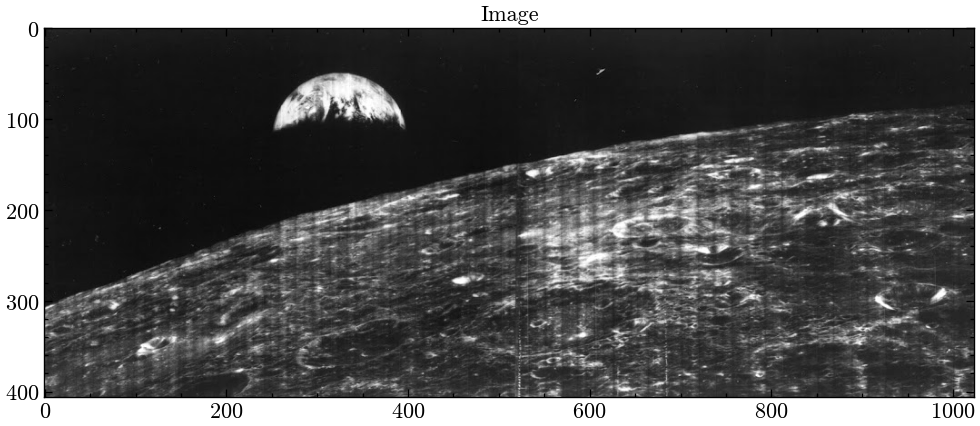

In [4]:
# Call the function to read the image
image = read_image(image_path, 0)

#### Comment: what type of artefacts do you see in the image?
-----



### 2D Fourier transform:

(c) Create a function that Fourier transforms this image and returns a two-panel figure with the original image on the left and a labeled 2D plot of its Fourier image on the right.

(d) Make a slice through the middle of the Fourier image in the same direction as the artefacts and plot the result. 

(e) Briefly comment, how do the image artefacts look in Fourier space?


In [5]:
# Create a function to compute the FFT of the image
def FFT(image):
    """
    Function to compute the Fast Fourier Transform (FFT) of an image.

    Parameters:
                image: (numpy array) - image as a numpy array

    Returns:    
                fft_image: (numpy array) - FFT of the image
    """

    # Compute the FFT of the image
    fft_image = np.fft.fft2(image)

    # Shift the zero frequency component to the center
    shift_fft_image = np.fft.fftshift(fft_image)

    # Compute the magnitude of the FFT
    magnitude_spectrum = np.abs(shift_fft_image)
    
    # Make the two-panel plot of the image and its FFT
    with plt.style.context(['science', 'notebook', 'no-latex']):
        fig, axs = plt.subplots(2, 1, figsize=(12, 12))
        axs[0].imshow(image, cmap='gray')
        axs[0].set_title('Image')

        axs[1].pcolor(np.log10(magnitude_spectrum),
                       shading = 'auto',cmap='Blues')
        axs[1].set_title('FFT of the Image')
        plt.show()

    return fft_image, shift_fft_image, magnitude_spectrum


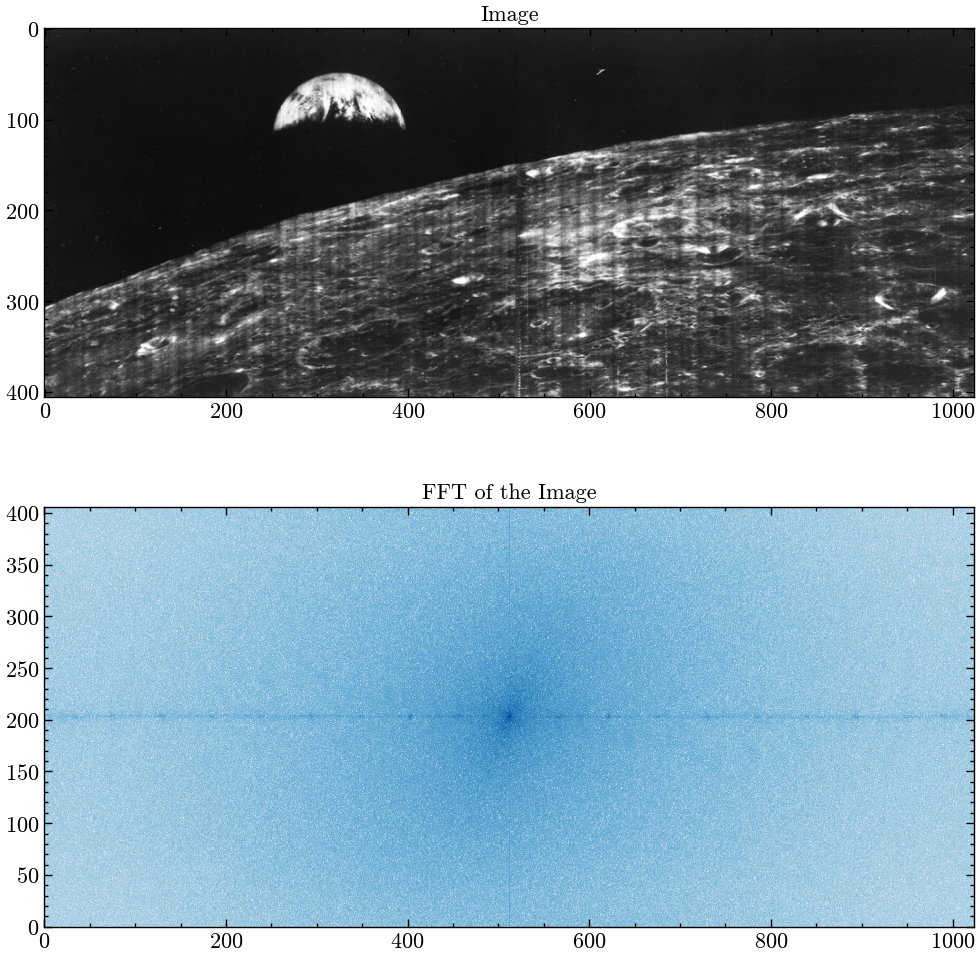

In [6]:
# Call the function to compute the FFT of the image
fft_image, shift_fft_image, magnitude_spectrum = FFT(image)

In [7]:
# Horizontal slice of the FFT image
middle_row = magnitude_spectrum.shape[0] // 2  # middle row
slice_1_fft_image = magnitude_spectrum[middle_row, :]

# Vertical slice of the FFT image
middle_col = magnitude_spectrum.shape[1] // 2  # middle column
slice_2_fft_image = magnitude_spectrum[:, middle_col]


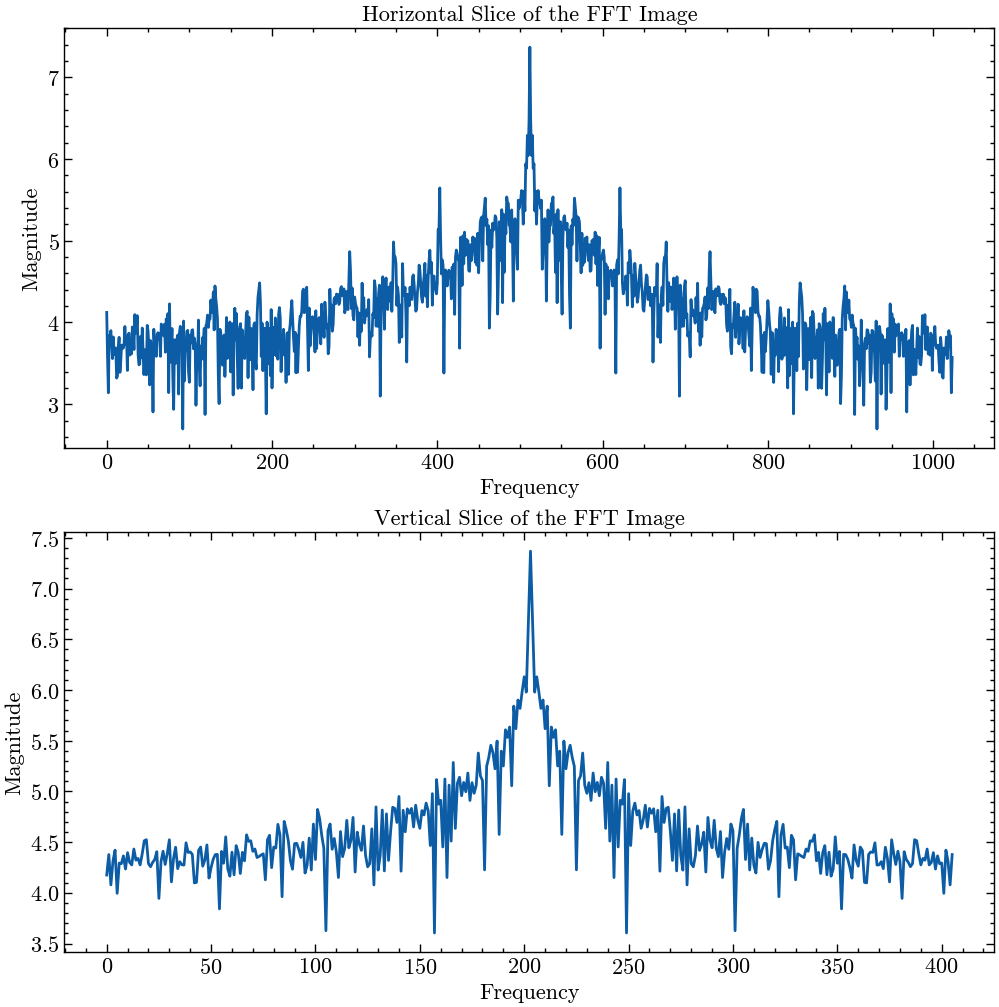

In [8]:
# Two-panel plot of the horizontal and vertical slices of the FFT image
with plt.style.context(['science', 'notebook', 'no-latex']):
    fig, axs = plt.subplots(2, 1, figsize=(12, 12))
    axs[0].plot(np.log10(slice_1_fft_image))
    axs[0].set_title('Horizontal Slice of the FFT Image')
    axs[0].set_xlabel('Frequency')
    axs[0].set_ylabel('Magnitude')

    axs[1].plot(np.log10(slice_2_fft_image))
    axs[1].set_title('Vertical Slice of the FFT Image')
    axs[1].set_xlabel('Frequency')
    axs[1].set_ylabel('Magnitude')
    plt.show()

#### Comment: how do the image artefacts look in Fourier space?
-----

### Masking and filtering:

(f) Create an appropriate mask for the Fourier image that matches the features associated with the image artefacts. Plot the mask.

(g) Use your mask from (f) to remove the artefacts from the Fourier image.

(h) Inverse Fourier transform the masked Fourier image and make a two-panel figure showing the original image on the left and the new filtered image (without the artefacts) on the right.

For this part, we will consider the artefacts to be the horizontal lines in the image. Since the artefacts are periodic, and produce those equally spaced horizontal spikes in the Fourier image, we can create a mask that removes those spikes.

In [9]:
def mask_function(image):
    """
    Function to create a mask for the FFT image.

    Parameters:
                image: (numpy array) - image as a numpy array

    Returns:    
                mask: (numpy array) - mask for the FFT image
    """

    # Create a mask for the FFT image
    mask = np.ones(image.shape)

    # Set the center of the mask to 1
        # The mask must be in along the x-axis in the centre
    # Avoiding the frequencies at centre
    mask[:, image.shape[1]//2 - 10:image.shape[1]//2 + 10] = 1
    mask[image.shape[0]//2 - 10:image.shape[0]//2 + 10, :] = 0
    
    mask[image.shape[0] // 2 - 20:image.shape[0] // 2 + 20,
         image.shape[1] // 2 - 20:image.shape[1] // 2 + 20] = 1

    # Plot the mask
    with plt.style.context(['science', 'notebook', 'no-latex']):
        plt.figure(figsize=(12, 10))
        plt.imshow(mask, cmap='gray')
        plt.title('Mask')
        plt.show()

    return mask

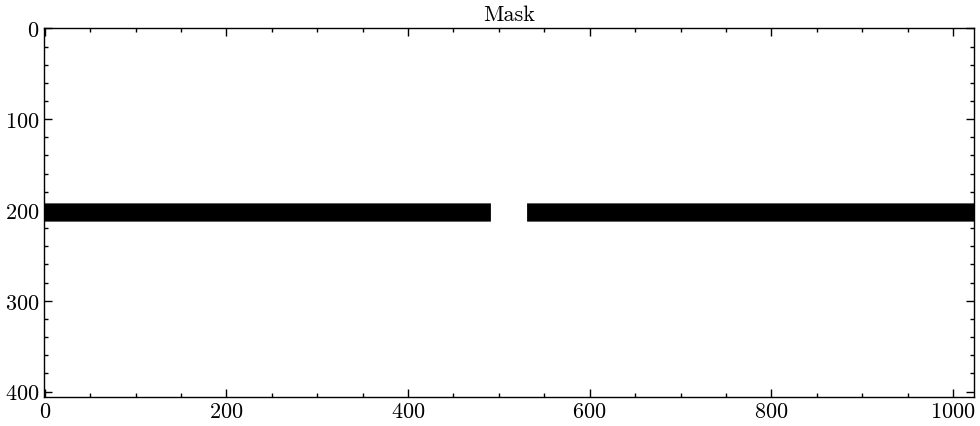

In [10]:
# Call the function to create a mask for the FFT image
mask = mask_function(magnitude_spectrum)

In [11]:
# Apply the mask to the FFT image
def mask_fft_image(magnitude_spectrum, shift_fft_image):
    """
    Function to apply a mask to the FFT image.

    Parameters:
                magnitude_spectrum: (numpy array) - magnitude of the FFT image
                shift_fft_image: (numpy array) - shifted FFT image

    Returns:    
                masked_fft_image: (numpy array) - masked FFT image
    """

    # Apply the mask to the FFT image
    masked_fft_image = shift_fft_image * mask

    # Compute the magnitude of the masked FFT image
    magnitude_masked_fft_image = np.abs(masked_fft_image)

    # Make the two-panel plot of the FFT image and its masked version
    with plt.style.context(['science', 'notebook', 'no-latex']):
        fig, axs = plt.subplots(2, 1, figsize=(12, 12))
        axs[0].pcolor(np.log10(magnitude_spectrum),
                      shading='auto', cmap='Blues')
        axs[0].set_title('FFT of the Image')

        axs[1].pcolor(np.log10(magnitude_masked_fft_image),
                      shading='auto', cmap='Blues')
        axs[1].set_title('Masked FFT of the Image')
        plt.show()

    return masked_fft_image

/tmp/ipykernel_105559/2497342664.py:27: RuntimeWarning: divide by zero encountered in log10
  axs[1].pcolor(np.log10(magnitude_masked_fft_image),


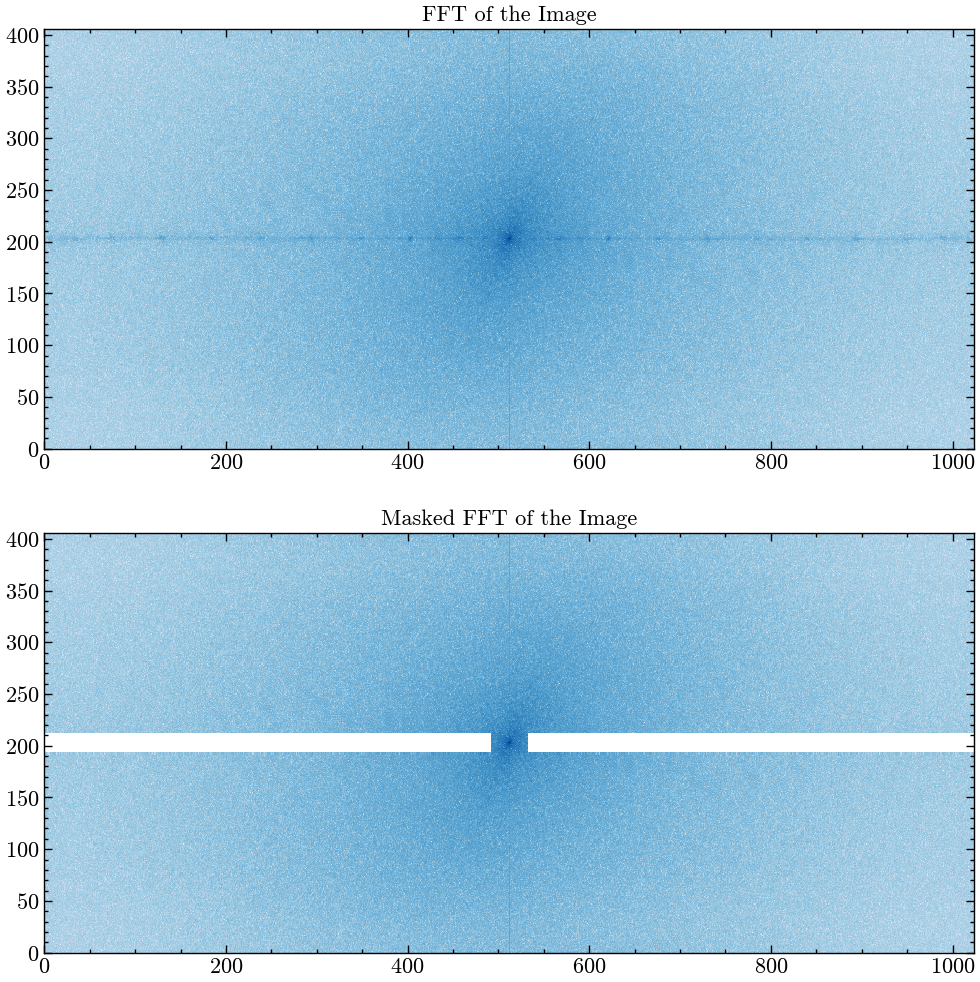

In [12]:
# Call the function to apply the mask to the FFT image
masked_fft_image = mask_fft_image(magnitude_spectrum, shift_fft_image)

In [13]:
# Apply the mask to the FFT image
masked_fft_image = shift_fft_image * mask

# Perform the inverse FFT
image_reconstructed = np.fft.ifft2(np.fft.ifftshift(masked_fft_image))

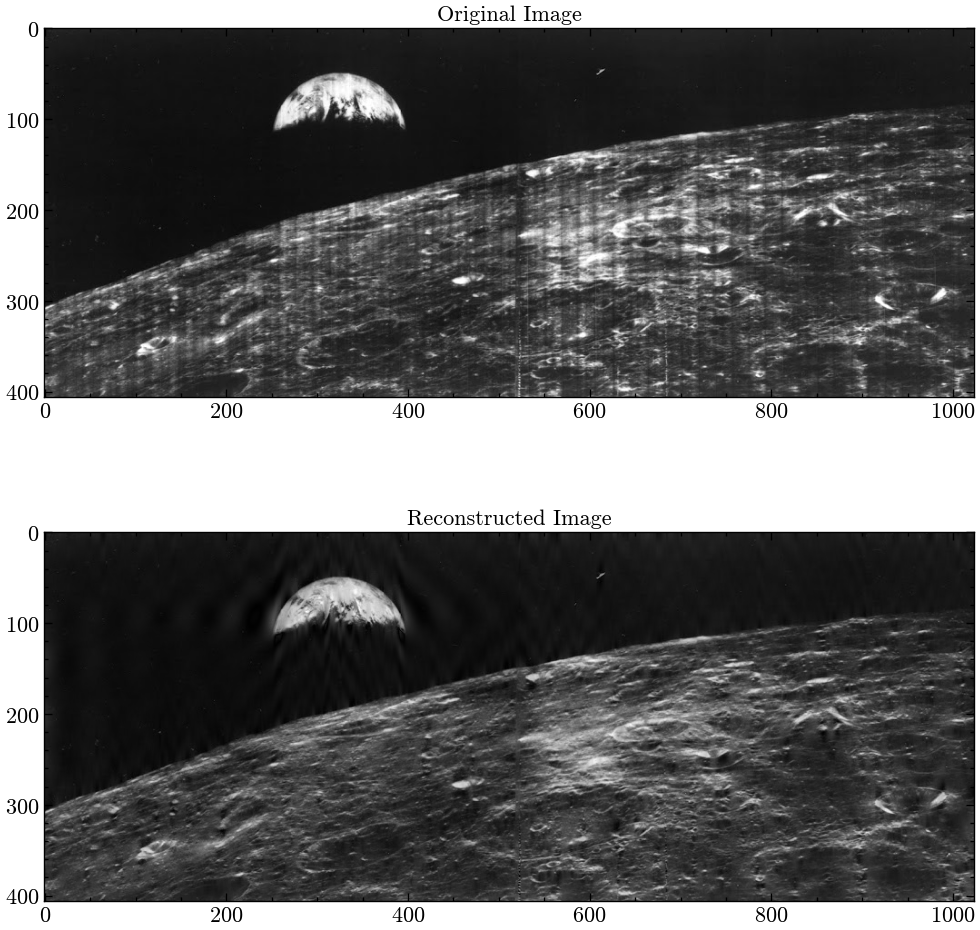

In [14]:
# Two panel plot of the original and reconstructed images
with plt.style.context(['science', 'notebook', 'no-latex']):
    fig, axs = plt.subplots(2, 1, figsize=(12, 12))
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title('Original Image')

    axs[1].imshow(np.abs(image_reconstructed), cmap='gray')
    axs[1].set_title('Reconstructed Image')
    plt.show()

### Artefact-free image:

(i) Create a function that combines all the previous steps. The function should receive an image file, apply the filter and plot the original and the filtered images. 

(j) Apply the filter function from (i) to the other two channels of the image. Using the output clean images, reconstruct the 3-layered image and make a two panel figure showing the original 3-layered image and your new artefact-free 3-layered image.

In [15]:
# Now, let's combine all the code in one function that takes the 
# image file and the channel to be plotted as input and returns the
# filtered image.
# It must not call the previous functions, but use the code from them.

def artifact_remover(image_path, channel):
    """
    Function to remove artifacts from an image.

    Parameters:
                image_path: (str) - path to the image file
                channel: (int) - channel to choose from the image

    Returns:    
                image_reconstructed: (numpy array) - filtered image
    """

    # Read the image
    image = Image.open(image_path)

    # Choose the channel
    image = image.getchannel(channel)

    # Compute the FFT of the image
    fft_image = np.fft.fft2(image)
    shift_fft_image = np.fft.fftshift(fft_image)
    magnitude_spectrum = np.abs(shift_fft_image)

    # Create a mask for the FFT image
    mask = np.ones(magnitude_spectrum.shape)
    mask[:, magnitude_spectrum.shape[1] // 2 - 10:magnitude_spectrum.shape[1] // 2 + 10] = 1
    mask[magnitude_spectrum.shape[0] // 2 - 10:magnitude_spectrum.shape[0] // 2 + 10, :] = 0
    mask[magnitude_spectrum.shape[0] // 2 - 20:magnitude_spectrum.shape[0] // 2 + 20,
         magnitude_spectrum.shape[1] // 2 - 20:magnitude_spectrum.shape[1] // 2 + 20] = 1

    # Apply the mask to the FFT image
    masked_fft_image = shift_fft_image * mask

    # Perform the inverse FFT
    image_reconstructed = np.fft.ifft2(np.fft.ifftshift(masked_fft_image))

    # Plot the original and reconstructed images
    # indicate the channel used
    with plt.style.context(['science', 'notebook', 'no-latex']):
        fig, axs = plt.subplots(2, 1, figsize=(12, 12))
        axs[0].imshow(image, cmap='gray')
        axs[0].set_title('Original Image (Channel {})'.format(channel))

        axs[1].imshow(np.abs(image_reconstructed), cmap='gray')
        axs[1].set_title('Reconstructed Image (Channel {})'.format(channel))
        plt.show()


    return np.abs(image_reconstructed)

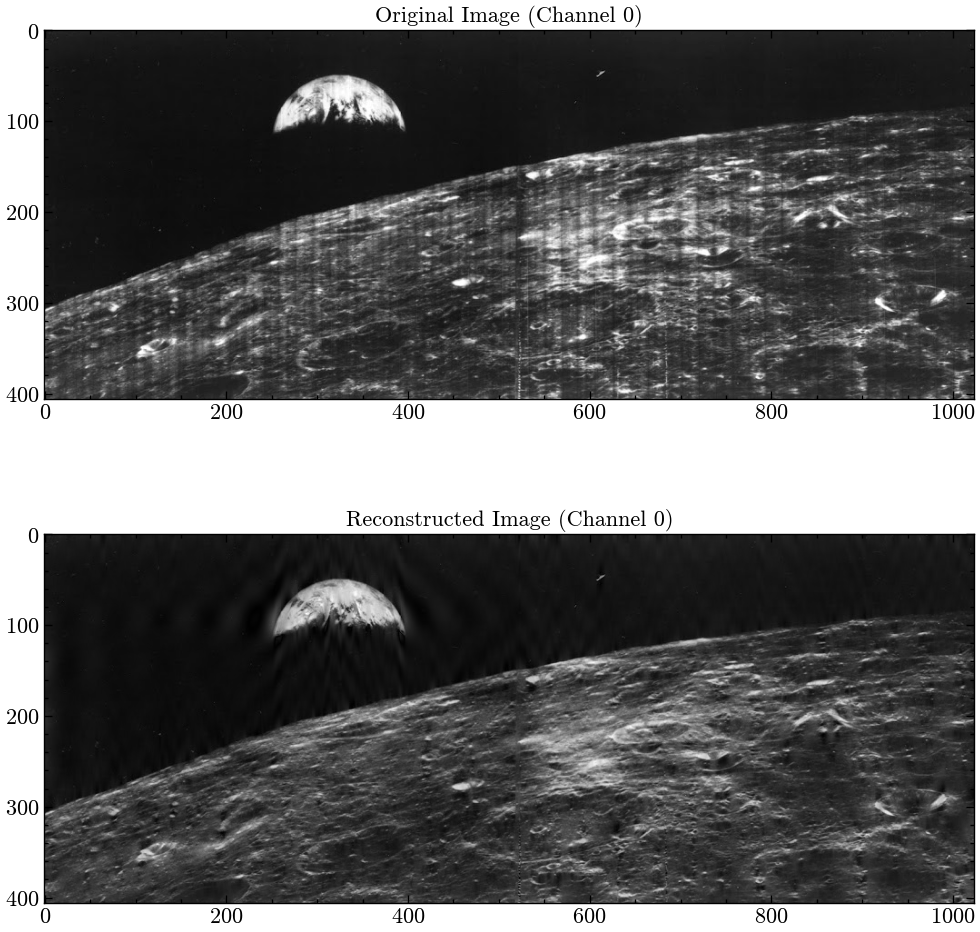

In [16]:
# Call the function to remove artifacts from the image
filtered_image = artifact_remover(image_path, 0)

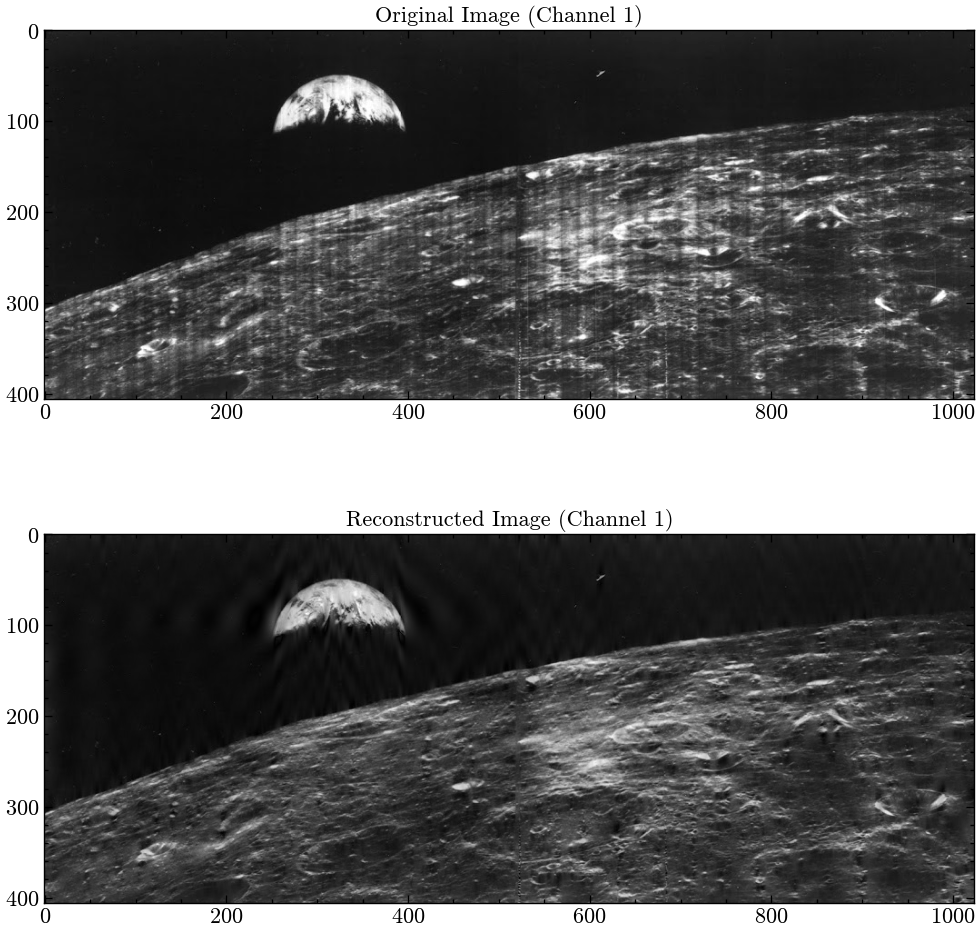

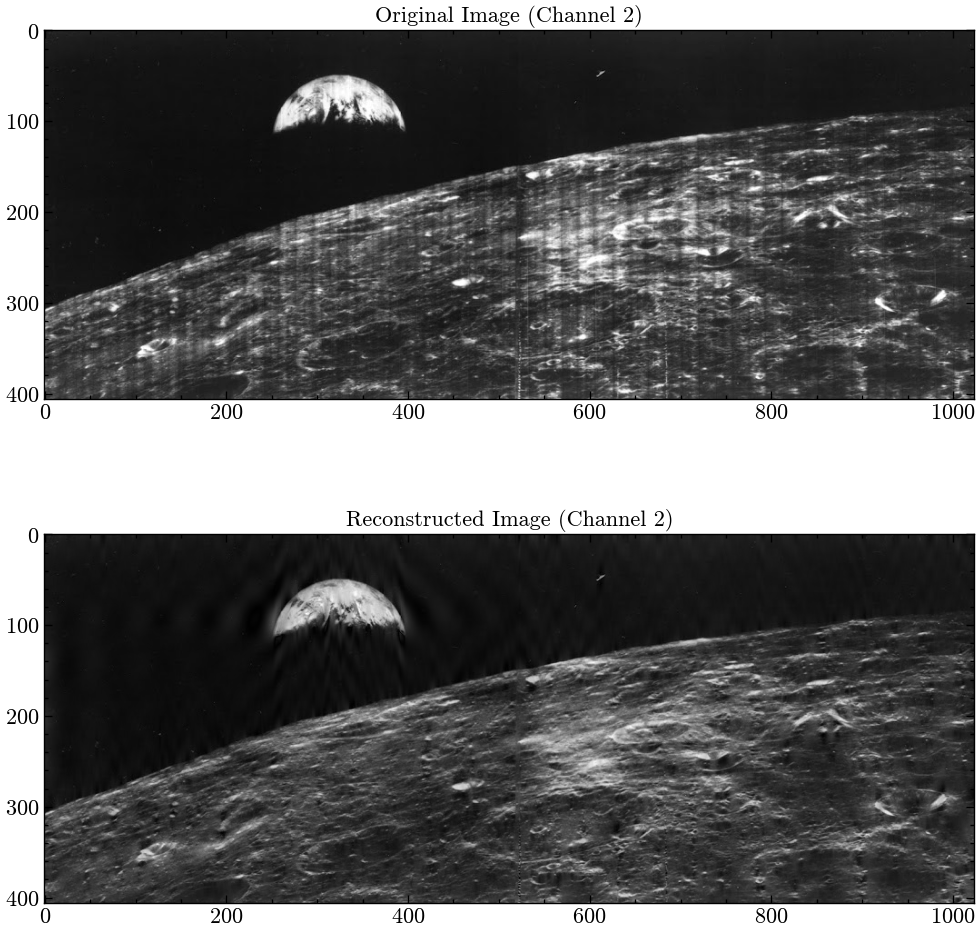

In [17]:
# Apply the filter to the other channels
filtered_image_1 = artifact_remover(image_path, 1)

filtered_image_2 = artifact_remover(image_path, 2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


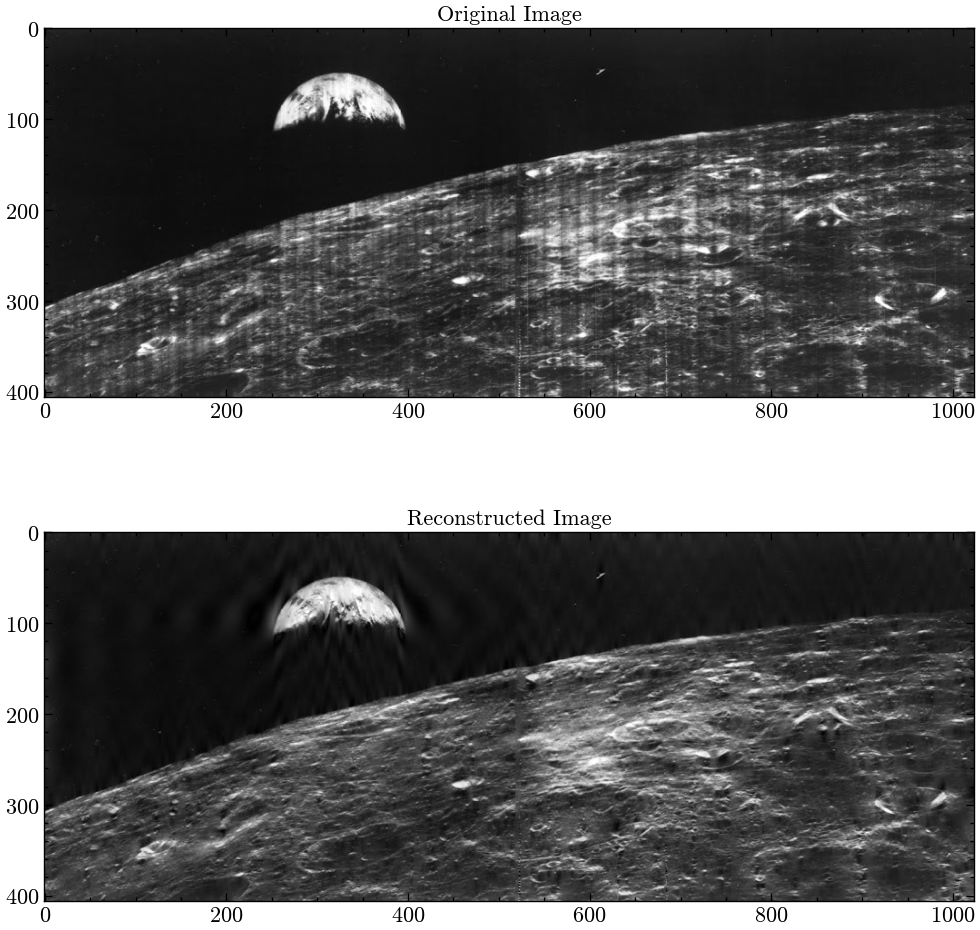

In [18]:
# Reconstruction of the image using all the channels

processed_image = np.zeros((filtered_image.shape[0], filtered_image.shape[1], 3), dtype= int)
processed_image[:, :, 0] = filtered_image
processed_image[:, :, 1] = filtered_image_1
processed_image[:, :, 2] = filtered_image_2

# Two panel plot of the original and reconstructed images
with plt.style.context(['science', 'notebook', 'no-latex']):
    fig, axs = plt.subplots(2, 1, figsize=(12, 12))
    axs[0].imshow(np.array(Image.open(image_path)), cmap='gray')
    axs[0].set_title('Original Image')

    axs[1].imshow(np.abs(processed_image), cmap='gray')
    axs[1].set_title('Reconstructed Image')
    plt.show()